                                                          Gaussian Mixture Model              

# Gaussian Mixture Model

A Gaussian Mixture Model (GMM) is a probabilistic model that assumes data points are generated from a mixture of several Gaussian (normal) distributions with unknown parameters. Unlike hard clustering methods such as K-Means which assign each point to a single cluster based on the closest centroid, GMM performs soft clustering by assigning each point a probability of belonging to multiple clusters. 

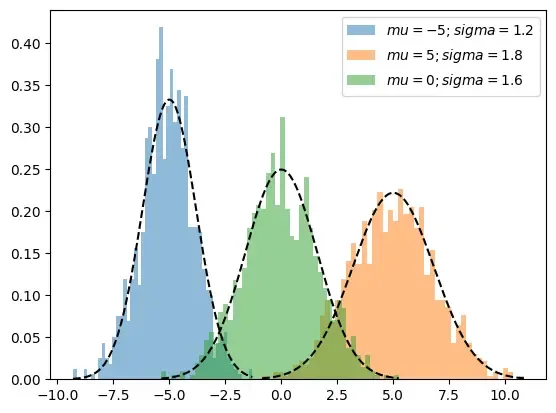

The graph shows a three one-dimensional Gaussian distributions with distinct means and variances. Each curve represents the theoretical probability density function (PDF) of a normal distribution, highlighting differences in location and spread.

## Working of GMM

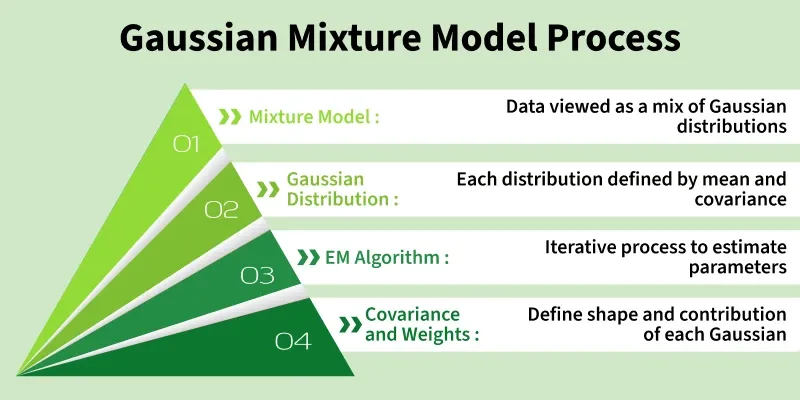

 A Gaussian Mixture Model (GMM) is a probabilistic model that assumes data points are generated from a mixture of several Gaussian (normal) distributions with unknown parameters. Unlike hard clustering methods such as K-Means which assign each point to a single cluster based on the closest centroid, GMM performs soft clustering by assigning each point a probability of belonging to multiple clusters.

 A Gaussian Mixture Model assumes that the data is generated from a mixture of K Gaussian distributions, each representing a cluster. Every Gaussian has its own mean μk , covariance Σk and mixing weight πk.

### 1. Posterior Probability (Cluster Responsibility)

The posterior probability, also known as the cluster responsibility, is calculated for each data point and each cluster. It represents the probability that a given data point belongs to a particular cluster, based on the current parameters of the Gaussian distributions. The formula for calculating the posterior probability is:
$$\gamma_{ik} = \frac{\pi_k \cdot \mathcal{N}(x_i | \mu_k, \Sigma_k)}{\sum_{j=1}^{K} \pi_j \cdot \mathcal{N}(x_i | \mu_j, \Sigma_j)}$$

Where:
- $\gamma_{ik}$ is the posterior probability that data point $x_i$ belongs to cluster $k$.
- $\pi_k$ is the mixing weight for cluster $k$.
- $\mathcal{N}(x_i | \mu_k, \Sigma_k)$ is the probability density function of the Gaussian distribution for cluster $k$ evaluated at data point $x_i$.
- The denominator sums over all clusters to normalize the probabilities.

### 2. Likelihood of a Data Point

The likelihood of a data point under the GMM is calculated by summing the contributions from all clusters, weighted by their mixing coefficients. The formula for the likelihood of a data point $x_i$ is:

$$P(x_i) = \sum_{k=1}^{K} \pi_k \cdot \mathcal{N}(x_i | \mu_k, \Sigma_k)$$

Where:
- $P(x_i)$ is the likelihood of data point $x_i$ under the GMM.
- $\pi_k$ is the mixing weight for cluster $k$.
- $\mathcal{N}(x_i | \mu_k, \Sigma_k)$ is the probability density function of the Gaussian distribution for cluster $k$ evaluated at data point $x_i$.
- The sum is taken over all clusters to account for the contribution of each cluster to the likelihood of the data point.

### 3. Expectation-Maximization (EM) Algorithm

The Expectation-Maximization (EM) algorithm is an iterative method used to find the maximum likelihood estimates of parameters in a GMM. It consists of two main steps: 
- **Expectation Step (E-step)**: In this step, the algorithm calculates the posterior probabilities (responsibilities) for each data point and each cluster using the current estimates of the parameters. This involves computing how likely it is that each data point belongs to each cluster based on the current Gaussian distributions.
- **Maximization Step (M-step)**: In this step, the algorithm updates the parameters of the Gaussian distributions (means, covariances) and the mixing weights based on the responsibilities calculated in the E-step. The parameters are updated to maximize the likelihood of the data given the current responsibilities.

### 4. Log-Likelihood of the Mixture Model

The log-likelihood of the mixture model is a measure of how well the model fits the data. It is calculated by taking the logarithm of the likelihood of the data under the GMM. The formula for the log-likelihood is:

$$\log L = \sum_{i=1}^{N} \log \left( \sum_{k=1}^{K} \pi_k \cdot \mathcal{N}(x_i | \mu_k, \Sigma_k) \right)$$

Where:
- $\log L$ is the log-likelihood of the data under the GMM.
- $N$ is the total number of data points.
- $\pi_k$ is the mixing weight for cluster $k$.
- $\mathcal{N}(x_i | \mu_k, \Sigma_k)$ is the probability density function of the Gaussian distribution for cluster $k$ evaluated at data point $x_i$.
- The inner sum accounts for the contribution of all clusters to the likelihood of each data point, and the outer sum aggregates this across all data points to compute the total log-likelihood of the model.

## Cluster Shapes in GMM

In GMM, each cluster is a Gaussian defined by:

* Mean (μ): Center of the cluster.
* Covariance (Σ): Controls the shape, orientation and spread of the cluster.

## Use Cases of GMM
1. **Clustering**: GMM can be used for clustering data points into groups based on their similarity, especially when clusters have different shapes and sizes.
2. **Density Estimation**: GMM can model the underlying probability distribution of the data, which is useful for tasks like anomaly detection and data generation.
3. **Image Segmentation**: GMM can be applied to segment images by modeling the pixel intensity distribution, allowing for the separation of different regions in an image.
4. **Speech Recognition**: GMM is used in speech recognition systems to model the distribution of acoustic features, helping to classify different phonemes or words based on their acoustic properties.

# Advantages of GMM
1. **Flexibility**: GMM can model clusters of various shapes and sizes due to its use of covariance matrices, unlike K-Means which assumes spherical clusters.
2. **Soft Clustering**: GMM provides probabilities of cluster membership, allowing for more nuanced assignments of data points to clusters, which can be beneficial in cases where data points may belong to multiple clusters.
3. **Probabilistic Framework**: GMM is based on a probabilistic framework, which allows for the estimation of the underlying data distribution and can be used for density estimation and anomaly detection.
4. **Handling Overlapping Clusters**: GMM can effectively handle overlapping clusters, as it assigns probabilities to data points rather than making hard assignments, making it suitable for complex datasets where clusters may not be well separated.

## Limitations of GMM  

1. **Sensitivity to Initialization**: GMM can converge to local optima depending on the initial parameter values, which may lead to suboptimal clustering results. Proper initialization techniques or multiple runs may be necessary to achieve better results.
2. **Assumption of Gaussian Distribution**: GMM assumes that the data is generated from a mixture of Gaussian distributions, which may not always be the case. If the underlying data distribution is not Gaussian, GMM may not perform well and could lead to inaccurate clustering results.
3. **Computational Complexity**: GMM can be computationally intensive, especially for large datasets or high-dimensional data, due to the need to estimate parameters for each Gaussian component and compute probabilities for each data point.
4. **Determining the Number of Clusters**: GMM requires the number of clusters (K) to be specified in advance, which can be challenging to determine without prior knowledge of the data. Methods such as the Bayesian Information Criterion (BIC) or the Akaike Information Criterion (AIC) can be used to help select the appropriate number of clusters, but this adds an additional layer of complexity to the modeling process.    


## Implementing Gaussian Mixture Model (GMM)

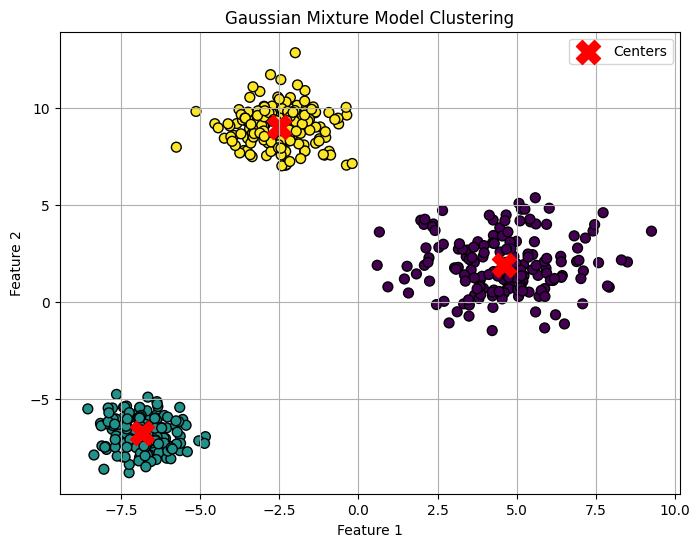

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# Generate synthetic data
X, y = make_blobs(
    n_samples=500,
    centers=3,
    random_state=42,
    cluster_std=[1.0, 1.5, 0.8]   # spread for each cluster
)

# Fit the Gaussian Mixture Model

gmm = GaussianMixture(
    n_components=3,        # number of Gaussian components
    covariance_type='full',
    random_state=42
)

gmm.fit(X)               
labels = gmm.predict(X)

# Plot clusters and component centers

plt.figure(figsize=(8, 6))

# scatter points colored by hard labels
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, edgecolor='k')

# plot Gaussian centers
plt.scatter(
    gmm.means_[:, 0],
    gmm.means_[:, 1],
    s=300,
    c='red',
    marker='X',
    label='Centers'
)

plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.legend()
plt.show()

